# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random as random


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key = weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key 
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
json = []

url = []
for x in cities:
    
    requests.get(query_url + x)
    response = requests.get(query_url + x).json()
    json.append(response)
    url.append(query_url + x)
    print(f'Requesting Json for {x}')
    print(requests.get(query_url + x))
    
print(len(json))  
    


Requesting Json for butaritari
<Response [200]>
Requesting Json for belushya guba
<Response [404]>
Requesting Json for khor
<Response [200]>
Requesting Json for pisco
<Response [200]>
Requesting Json for shasta lake
<Response [200]>
Requesting Json for sao miguel do guama
<Response [200]>
Requesting Json for maceio
<Response [200]>
Requesting Json for rikitea
<Response [200]>
Requesting Json for fare
<Response [200]>
Requesting Json for thompson
<Response [200]>
Requesting Json for palabuhanratu
<Response [404]>
Requesting Json for saldanha
<Response [200]>
Requesting Json for orange
<Response [200]>
Requesting Json for saint-philippe
<Response [200]>
Requesting Json for port elizabeth
<Response [200]>
Requesting Json for bluff
<Response [200]>
Requesting Json for kamenka
<Response [200]>
Requesting Json for amarillo
<Response [200]>
Requesting Json for ushuaia
<Response [200]>
Requesting Json for caravelas
<Response [200]>
Requesting Json for pevek
<Response [200]>
Requesting Json for

Requesting Json for basco
<Response [200]>
Requesting Json for luau
<Response [200]>
Requesting Json for tura
<Response [200]>
Requesting Json for ilulissat
<Response [200]>
Requesting Json for norden
<Response [200]>
Requesting Json for qaanaaq
<Response [200]>
Requesting Json for shaoyang
<Response [200]>
Requesting Json for longlac
<Response [404]>
Requesting Json for port hardy
<Response [200]>
Requesting Json for vaitupu
<Response [404]>
Requesting Json for plouzane
<Response [200]>
Requesting Json for umm kaddadah
<Response [200]>
Requesting Json for aswan
<Response [200]>
Requesting Json for charlestown
<Response [200]>
Requesting Json for miri
<Response [200]>
Requesting Json for asfi
<Response [200]>
Requesting Json for saleaula
<Response [404]>
Requesting Json for narsaq
<Response [200]>
Requesting Json for sisimiut
<Response [200]>
Requesting Json for geer
<Response [200]>
Requesting Json for pudozh
<Response [200]>
Requesting Json for muros
<Response [200]>
Requesting Json 

Requesting Json for starkville
<Response [200]>
Requesting Json for souillac
<Response [200]>
Requesting Json for tazovskiy
<Response [200]>
Requesting Json for muroto
<Response [200]>
Requesting Json for rio gallegos
<Response [200]>
Requesting Json for adrar
<Response [200]>
Requesting Json for ayan
<Response [200]>
Requesting Json for atar
<Response [200]>
Requesting Json for iquitos
<Response [200]>
Requesting Json for lilongwe
<Response [200]>
Requesting Json for enumclaw
<Response [200]>
Requesting Json for porbandar
<Response [200]>
Requesting Json for warqla
<Response [404]>
Requesting Json for santa maria
<Response [200]>
Requesting Json for ust-nera
<Response [200]>
Requesting Json for deputatskiy
<Response [200]>
Requesting Json for crab hill
<Response [404]>
Requesting Json for ranong
<Response [200]>
Requesting Json for zoniana
<Response [200]>
Requesting Json for copainala
<Response [200]>
Requesting Json for ambovombe
<Response [200]>
Requesting Json for qui nhon
<Respon

Requesting Json for kuryk
<Response [200]>
Requesting Json for pershotravneve
<Response [200]>
Requesting Json for demba
<Response [200]>
Requesting Json for ulaanbaatar
<Response [200]>
Requesting Json for yarensk
<Response [200]>
Requesting Json for catuday
<Response [200]>
Requesting Json for charagua
<Response [200]>
Requesting Json for baculin
<Response [200]>
Requesting Json for eureka
<Response [200]>
Requesting Json for kilindoni
<Response [200]>
Requesting Json for saint-francois
<Response [200]>
Requesting Json for copiapo
<Response [200]>
Requesting Json for pangnirtung
<Response [200]>
Requesting Json for severo-kurilsk
<Response [200]>
Requesting Json for belaya gora
<Response [200]>
Requesting Json for moss point
<Response [200]>
Requesting Json for steinbach
<Response [200]>
Requesting Json for broome
<Response [200]>
Requesting Json for tolaga bay
<Response [200]>
Requesting Json for moree
<Response [200]>
Requesting Json for sogdiondon
<Response [404]>
Requesting Json 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# pd.DataFrame(json).to_csv('json.csv')

city_data = {}
city_data["City"] = []
city_data["Cloudiness"] = []
city_data["Country"] = []
city_data["Date"] = []
city_data["Humidity"] = []
city_data["Lat"] = []
city_data["Lng"] = []
city_data["Max Temp"] = []
city_data["Wind Speed"] = []



#     try:
#         clouds.append(response['clouds']['all'])
#         clouds.append(response['sys']['AU'])
#     except KeyError:
#         clouds.append(0)



# city_data=pd.DataFrame(city_data)
# city_data.head()

# city_data

for x in range(len(json)):
    try:
        city_data["City"].append(json[x]['name'])
    except KeyError:
            city_data["City"].append(cities[x] + ' - ' + json[x]['message'])
    try:
        city_data["Cloudiness"].append(json[x]['clouds']['all'])
    except KeyError:
            city_data["Cloudiness"].append(0)            
    try:
        city_data["Country"].append(json[x]['sys']['country'])
    except KeyError:
            city_data["Country"].append(json[x]['message'])
    try:
        city_data["Date"].append(json[x]['dt'])
    except KeyError:
           city_data["Date"].append(0)
    try:
        city_data["Humidity"].append(json[x]['main']['humidity'])
    except KeyError:
           city_data["Humidity"].append(0)       
    try:
        city_data["Lat"].append(json[x]['coord']['lat'])
    except KeyError:
           city_data["Lat"].append(0)
    try:
        city_data["Lng"].append(json[x]['coord']['lon'])
    except KeyError:
           city_data["Lng"].append(0)
    try:
        city_data["Max Temp"].append(json[x]['main']['temp'])
    except KeyError:
           city_data["Max Temp"].append(0)
    try: 
        city_data["Wind Speed"].append(json[x]['wind']['speed'])
    except KeyError:
           city_data["Wind Speed"].append(0)                        
                    
            

city_data = pd.DataFrame(city_data)


city_fail = city_data[city_data['Country'] == "city not found"]

city_data = city_data[city_data['Country'] != "city not found"]
 
if len(city_data) > 500:
    print(f'Proceed: {len(city_data)} cities retrieved')
else: 
    print(f'Re-request Jsons: {len(city_data)} cities retrieved. {len(city_fail)} requests failed.')


Proceed: 584 cities retrieved


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

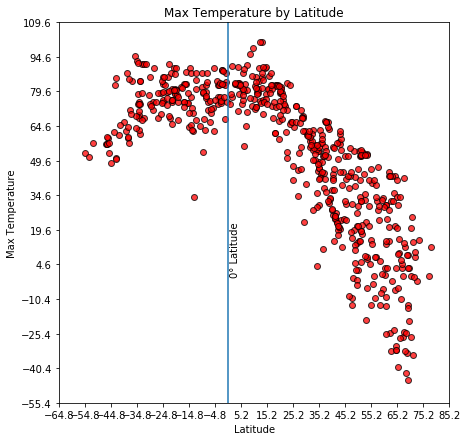

In [7]:
lat_total = city_data['Lat'].to_list()

temp_total = city_data['Max Temp'].tolist()

plt.scatter(lat_total,temp_total, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)

plt.title("Max Temperature by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(temp_total)-10, max(temp_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

plt.savefig('temp_lat.png')

plt.show()




In [6]:
#The line of best fit in the above scatter plot shows strong negative correlation between locations with latitudes that are nearer to 0 and higher temperatures. 
#The correlation skews sharply to very low tempatures as locations with positive latitudes increase further from zero.
#Outliers in the correlation occur in latitudes ranging from -45 and -24 degrees, where the temperatures seem to show a positive correlation between lower latitudes and lower temperatures.


#### Latitude vs. Humidity Plot

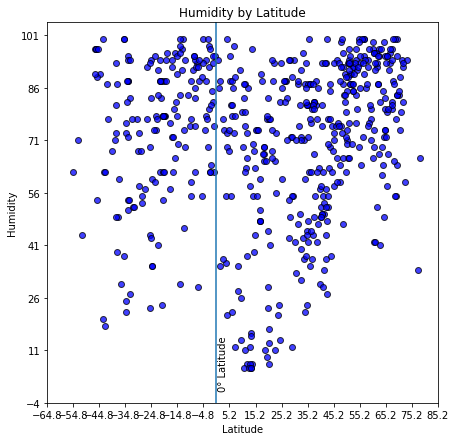

In [10]:
lat_total = city_data['Lat'].to_list()

humid_total = city_data['Humidity'].tolist()

plt.scatter(lat_total,humid_total, marker="o", facecolors="blue", edgecolors="black",
           alpha=0.75)

plt.title("Humidity by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Humidity")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(humid_total)-10, max(humid_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

plt.savefig('humid_lat.png')

plt.show()

In [8]:
#The above scatter plot shows virtually no correlation between humidity and latitude. 
#There are outliers in the scatterplot across the range of latitudes, for both positive and negative latitudes.
#There is a cluster of possible correlation between latitudes ranging from 60 to 75 degress may imply the beginning of a line of best fit; 
#however, with the very small sample size and lack of longitude as a cross reference, it is difficult to determine whether this possible correlation occurs
#only by latitude, or if it is more depedant on another factor than latitude (for instance sea level, relative distance from a body of water).

#### Latitude vs. Cloudiness Plot

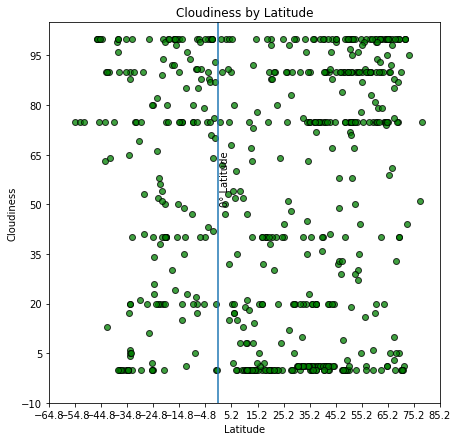

In [11]:
lat_total = city_data['Lat'].to_list()

cloud_total = city_data['Cloudiness'].tolist()

plt.scatter(lat_total,cloud_total, marker="o", facecolors="green", edgecolors="black",
           alpha=0.75)

plt.title("Cloudiness by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(cloud_total)-10, max(cloud_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,50,'0° Latitude',rotation=90)

plt.savefig('cloud_lat.png')

plt.show()

In [10]:
#The above scatter plot shows no correlation bewtween latitude and cloudiness.
#There are multiple data points throughout all latitude ranges, which prevent the drawing of an ascending or descending line
#of best fit. The scatter plot seems to imply the need for an additional axis as reference (i.e. longitude), as patterns do seem
#to be forming, but not in a manner that suggests a consistent linear slope between the x and y axes. 

#### Latitude vs. Wind Speed Plot

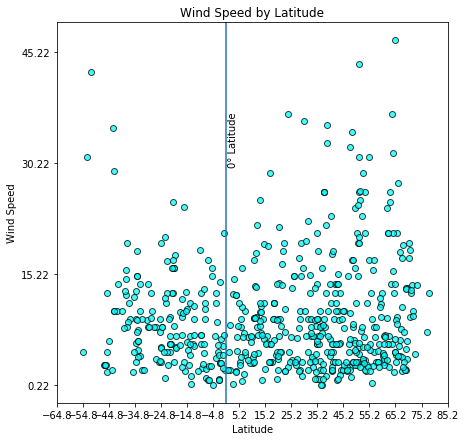

In [12]:
lat_total = city_data['Lat'].to_list()

wind_total = city_data['Wind Speed'].tolist()

plt.scatter(lat_total,wind_total, marker="o", facecolors="aqua", edgecolors="black",
           alpha=0.75)

plt.title("Wind Speed by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(wind_total), max(wind_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,30,'0° Latitude',rotation=90)

plt.savefig('wind_lat.png')

plt.show()


In [12]:
#The above scatter plot shows a very weak possible correlation between windspeed and latitude. 
#The scatter plot is better interpreted as no correlation between latitude and wind speed.
#A line of best fit may possibly be drawn which may show the hint of a correlation between higher wind speeds and more positive latitudes.
#The plot would again benefit from a larger sample size. 

## Linear Regression

Sum of X-Coordinates are 12236.480000000003.
Sum of Y-Coordinates are 30299.989999999936.
The sum of the product of each (x,y) pair is 174798.22459999993.
The sum of each x-coordinate squared is 908849.0876000002.
The sum of each x-coordinate squared is 2148025.0317000016.
-0.7051374653078015 is the slope of the line.
66.65820289638621 is the y-intercept of the line.


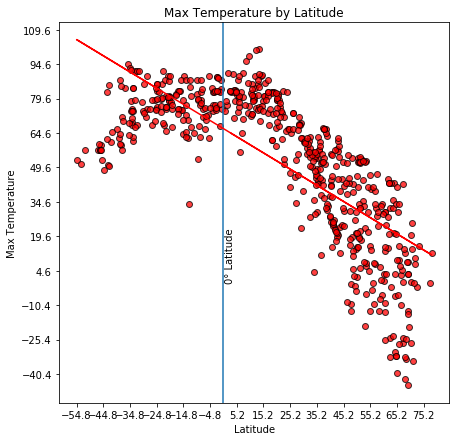

In [13]:
#Bonus
x_coord = lat_total

y_coord = temp_total

array_length = len(temp_total)

#calculate sum of x_coords
sum_x = sum(lat_total)

#calculate sum of y_coords
sum_y = sum(temp_total)

print(f'Sum of X-Coordinates are {sum_x}.')
print(f'Sum of Y-Coordinates are {sum_y}.')

xy_sum = []

#create list with length of 4 to house xy_sum calculations
xy_sum = [0 for x in range(len(temp_total))]

#for loop to create a list of the product of each data set i.e. (x_coord[0],y_coord[0]) = xy_sum[0]
for x in range(len(x_coord)):
    xy_sum[x] = x_coord[x]*y_coord[x]
          
        
#sum the xy_product list    
xy_sum = sum(xy_sum)

print(f'The sum of the product of each (x,y) pair is {xy_sum}.')

#create empty list to house the square calculations of each coordinate
x_ponent = []

x_ponent = [0 for x in range(array_length)]

y_ponent = []

y_ponent = [0 for x in range(array_length)]

#calculate square of each x and y value and create a list of the products
for x in range(len(x_coord)):
    x_ponent[x] = x_coord[x]*x_coord[x]

for x in range(len(y_coord)):
    y_ponent[x] = y_coord[x]*y_coord[x]
    
#sum the products of the x & y squared lists    
x_ponent = sum(x_ponent)    

y_ponent = sum(y_ponent)
    
print(f'The sum of each x-coordinate squared is {x_ponent}.')

print(f'The sum of each x-coordinate squared is {y_ponent}.')

#N = number of data sets, 6
N = array_length

#calculate slope of data set
m = ((N * xy_sum) - (sum_x * sum_y)) / ((N * x_ponent) - (sum_x * sum_x))

#calculate y intercept of data set
c = ((x_ponent * sum_y ) - (sum_x * xy_sum)) / ((N * x_ponent) - (sum_x * sum_x))

print(f'{m} is the slope of the line.')

print(f'{c} is the y-intercept of the line.')

y_coord2 = []

#equation of a line is y = mx+c. Calculate y coordinates by multiplying x_coords by slope plus y-intercept.

y_coord2 = [m*x + c for x in x_coord]

#create scatter plot

lat_total = city_data['Lat'].to_list()

temp_total = city_data['Max Temp'].tolist()

plt.scatter(lat_total,temp_total, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)

plt.title("Max Temperature by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(temp_total)-10, max(temp_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

#plot x & y coordinates

plt.plot(x_coord,y_coord2,'-r')

plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames

city_data_north = city_data.loc[city_data['Lat'] >= 0]

city_data_south = city_data.loc[city_data['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8483740834496495


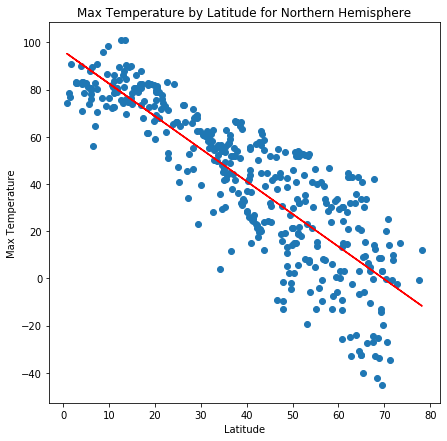

In [15]:
x_values = city_data_north['Lat']
y_values = city_data_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Max Temperature by Latitude for Northern Hemisphere')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.savefig('temp_north_lat.png')

plt.show()

In [ ]:
#The above linear regression shows that there is a strong correlation between higher temperatures and latitiudes that are closer to 0.
#The correlation becomes weaker as the latitude increases further from 0, as there are more plot points which are farther from 
#the line of best fit.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3709126473571268


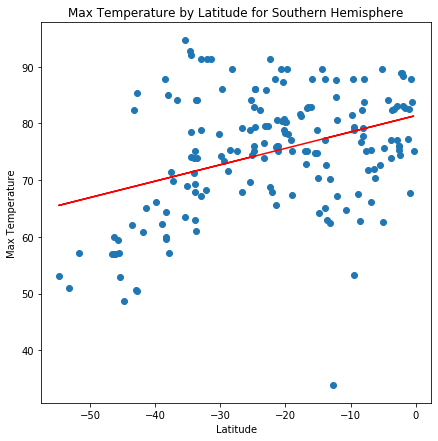

In [16]:
x_values = city_data_south['Lat']
y_values = city_data_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Max Temperature by Latitude for Southern Hemisphere')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.savefig('temp_south_lat.png')

plt.show()

In [ ]:
#The above linear regression shows a very weak or no correlation between higher temperatures and latitudes which are closer to 0.
#The correlation seems to be strongest with latitudes that are higher than -10.
#There are more plot points which seem to be further from the line of best fit. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.397274756049379


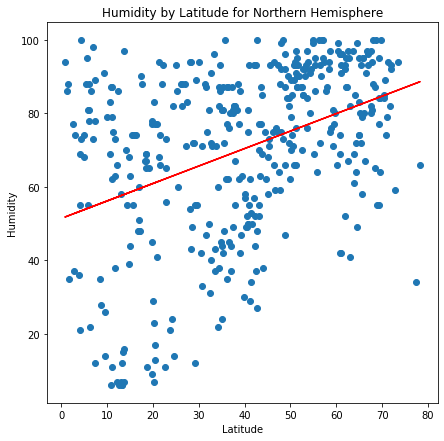

In [17]:
x_values = city_data_north['Lat']
y_values = city_data_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity by Latitude for Northern Hemisphere')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.savefig('humid_north_lat.png')

plt.show()


In [ ]:
#The above linear regression shows no correlation between humidity and latitudes which are either closer to or further from 0 in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2456758868925402


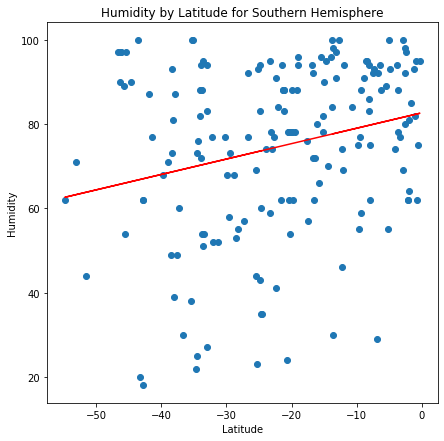

In [18]:
x_values = city_data_south['Lat']
y_values = city_data_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity by Latitude for Southern Hemisphere')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.savefig('humid_south_lat.png')
plt.show()


In [ ]:
#The above  linear regression shows no correlation between humidity and latitudes which are either closer to or further from 0 in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30342029599375087


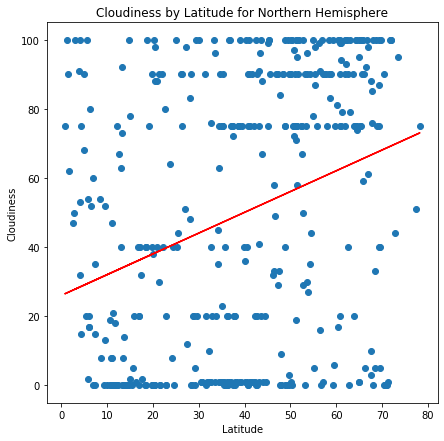

In [19]:
x_values = city_data_north['Lat']
y_values = city_data_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness by Latitude for Northern Hemisphere')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.savefig('cloud_north_lat.png')
plt.show()


In [ ]:
#The above linear regression shows no correlation between cloudiness and latitudes which are either closer to or further from 0 in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07965086886665432


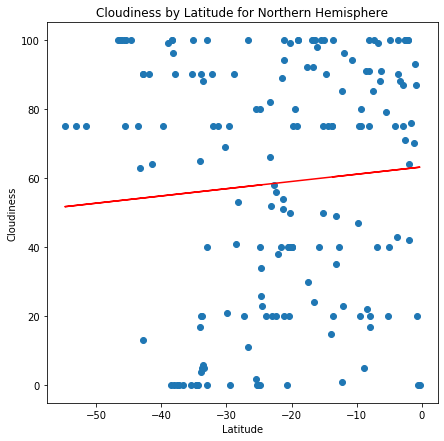

In [20]:
x_values = city_data_south['Lat']
y_values = city_data_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness by Latitude for Northern Hemisphere')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.savefig('cloud_south_lat.png')
plt.show()


In [ ]:
#The above linear regression shows no correlation between cloudiness and latitudes which are either closer to or further from 0 in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11566207903569355


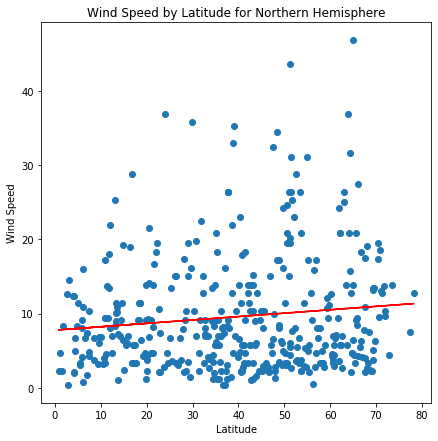

In [21]:
x_values = city_data_north['Lat']
y_values = city_data_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed by Latitude for Northern Hemisphere')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.savefig('wind_north_lat.png')
plt.show()


In [ ]:
#The above linear regression shows no correlation between windspeeds and latitudes which are either closer to or further from 0 in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2665091231740207


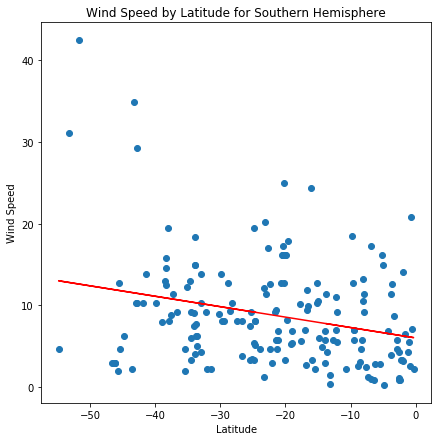

In [22]:
x_values = city_data_south['Lat']
y_values = city_data_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed by Latitude for Southern Hemisphere')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.savefig('wind_south_lat.png')
plt.show()


In [ ]:
#The above linear regression shows no correlation between windspeeds and latitudes which are either closer to or further from 0 in the southern hemisphere.

In [ ]:
#Observations:

#1)Of the four categories of weather patterns, the strongest correlation occurred between latitude and max temperature.
#2)The correlation between latitude and temperature is strongest in the northern hemisphere, the negative r value of -0.8727206021086552 implies a strong negative correlation between higher temperatures and higher latititudes, or a strong positive correlation between higher temperatures and lower latitudes. 
#The correlation between latitude and temperature is much weaker in the southern hemisphere and may be so weak as to imply no correlation, but this may be due to the smallness of the sample size.
#3)For the remaining 3 categories, the scatterplots imply no correlation with latitude, in either the southern or northern hemispheres. This is backed up by the r values which are all close to 0. 